In [1]:
import pandas as pd
import numpy as np

In [2]:
from src.PortfolioIndicator import PortfolioIndicator
from src.PortfolioConstructor import PortfolioConstructor

IndentationError: unindent does not match any outer indentation level (PortfolioConstructor.py, line 141)

### Import Data

In [7]:
data_directory = "data/"
file = "yahoo_data_filter_0_1.csv"

In [8]:
df = pd.read_csv(data_directory+file)
df.index = pd.to_datetime(df.iloc[:,0])
df = df.iloc[:,1:]

In [9]:
df.head()

,ADA-USD,ADX-USD,AE-USD,ANT-USD,ARDR-USD,ARK-USD,ATB-USD,BAT-USD,BCH-USD,BLOCK-USD,...,XEM-USD,XLM-USD,XMR-USD,XRP-USD,XUC-USD,XVG-USD,XZC-USD,ZEC-USD,ZEN-USD,ZRX-USD
date,,,,,,,,,,,,,,,,,,,,,
2017-12-31,0.719695,2.78937,1.32136,3.88903,1.72013,7.04232,0.447756,0.412203,2533.010010,44.567799,...,1.03405,0.360756,349.026001,2.30057,8.88856,0.222600,112.322998,505.510986,59.787899,0.895721
2018-01-01,0.728657,3.10880,1.30022,4.27365,1.60770,7.60626,0.445190,0.475599,2432.540039,41.992901,...,1.04137,0.480008,358.989990,2.39103,9.01810,0.156131,125.442001,577.192993,56.268101,0.877714
2018-01-02,0.782587,2.95154,1.38313,4.60514,1.83907,7.87181,0.462033,0.563300,2711.000000,44.665798,...,1.16018,0.564766,383.416992,2.48090,9.47555,0.144905,126.078003,583.505981,52.121899,0.896672
2018-01-03,1.079660,2.85780,1.52833,6.55136,1.95408,7.59385,0.490322,0.651219,2608.689941,49.891701,...,1.79028,0.896227,412.062988,3.10537,9.92106,0.145221,124.279999,581.888977,50.143101,0.974472
2018-01-04,1.114120,2.85536,1.80678,6.27358,1.78215,7.11654,0.474837,0.634125,2430.179932,50.342300,...,1.64481,0.724050,403.048004,3.19663,10.46710,0.159184,117.002998,595.190002,55.009499,1.045260


### Strategy Test

In [10]:
universe_df = df

#### Calculate Multiple Signal

In [11]:
momentum_period = 3
waiting_time = 1

In [12]:
complete_ret_sub_df_3 = universe_df.pct_change(periods=momentum_period).shift(waiting_time).dropna()

In [13]:
momentum_period = 1
waiting_time = 1

In [14]:
complete_ret_sub_df_1 = universe_df.pct_change(periods=momentum_period).shift(waiting_time).dropna()

In [15]:
complete_ret_sub_df_long_3 = complete_ret_sub_df_3.stack()

complete_ret_sub_df_long_1 = complete_ret_sub_df_1.stack()

In [16]:
signal_df_3 = complete_ret_sub_df_long_3.index.to_frame()
signal_df_3.index = range(0,signal_df_3.shape[0])
signal_df_3["momentum_3"] = list(complete_ret_sub_df_long_3)
signal_df_3.columns=["date","ticker","momentum_3"]

In [17]:
signal_df_1 = complete_ret_sub_df_long_1.index.to_frame()
signal_df_1.index = range(0,signal_df_1.shape[0])
signal_df_1["momentum_1"] = list(complete_ret_sub_df_long_1)
signal_df_1.columns=["date","ticker","momentum_1"]

In [18]:
signal_merge_df = signal_df_3.merge(signal_df_1,on=["date","ticker"],how="left")

#### Create Double Sort Indicator

In [19]:
signal_1 = "momentum_1"
signal_2 = "momentum_3"
df = signal_merge_df

rebalance_date_series = list(set(signal_df_3["date"]))

number_1 = 5
number_2 = 2

In [20]:
indicator_creator = PortfolioIndicator()

initialized.


In [21]:
signal_merge_df

,date,ticker,momentum_3,momentum_1
0,2018-01-04,ADA-USD,0.500163,0.379604
1,2018-01-04,ADX-USD,0.024532,-0.031760
2,2018-01-04,AE-USD,0.156634,0.104979
3,2018-01-04,ANT-USD,0.684574,0.422619
4,2018-01-04,ARDR-USD,0.136007,0.062537
...,...,...,...,...
103830,2021-01-03,XVG-USD,-0.050796,0.010035
103831,2021-01-03,XZC-USD,-0.059965,-0.012876
103832,2021-01-03,ZEC-USD,-0.099644,0.017821
103833,2021-01-03,ZEN-USD,0.082968,-0.004642


In [23]:
indicator_df = indicator_creator.create_indicator_double_sort(df = signal_merge_df,
                                              signal_1_name = signal_1,
                                              signal_2_name = signal_2,
                                              rebalance_date_series = rebalance_date_series,
                                              number_1 = number_1,
                                              number_2 = number_2)

### Calculate return 

In [37]:
complete_sub_df_1 = universe_df.pct_change().dropna()
complete_sub_df_1_long = complete_sub_df_1.stack()

In [38]:
index_df = complete_sub_df_1_long.index.to_frame()
index_df["ret"] = complete_sub_df_1_long
index_df.index=range(0,index_df.shape[0])
index_df.columns = ["date","ticker","ret"]

In [39]:
return_df = index_df

In [40]:
merge_df = return_df.merge(indicator_df,on=["date","ticker"])

In [42]:
        def year(x):

            return x.year

        def month(x):

            return x.month

        def day(x):

            return x.day

In [43]:
merge_df["year"] = merge_df["date"].apply(year)
merge_df["month"] = merge_df["date"].apply(month)
merge_df["day"] = merge_df["date"].apply(day)

In [44]:
df = merge_df

In [46]:
        def equal_weight_return(x):
            
            return_series = x["ret"]
            total_number = len(return_series)
            
            return sum(return_series/total_number)

In [48]:
port_df = df.groupby(["momentum_1_indicator","momentum_3_indicator","year","month","day"]).apply(equal_weight_return)

In [49]:
index_df = port_df.index.to_frame()

In [50]:
port_df = pd.concat([index_df,port_df],axis=1)

In [51]:
port_df.columns = ["momentum_1_indicator","momentum_3_indicator","year","month","day","portfolio_return"]

In [52]:
port_df["date"] = port_df["year"].astype(str) + "-" + port_df["month"].astype(str) + "-" + port_df["day"].astype(str)

In [53]:
port_df["date"] = pd.to_datetime(port_df["date"])

In [54]:
port_df = port_df[["momentum_1_indicator","momentum_3_indicator","date","portfolio_return"]]

In [57]:
port_df.index = range(0,port_df.shape[0])

In [58]:
a = pd.pivot_table(port_df,values="portfolio_return",index=["date"],columns=["momentum_1_indicator","momentum_3_indicator"])

In [61]:
cum_return = (a+1).cumprod()

<AxesSubplot:xlabel='date'>

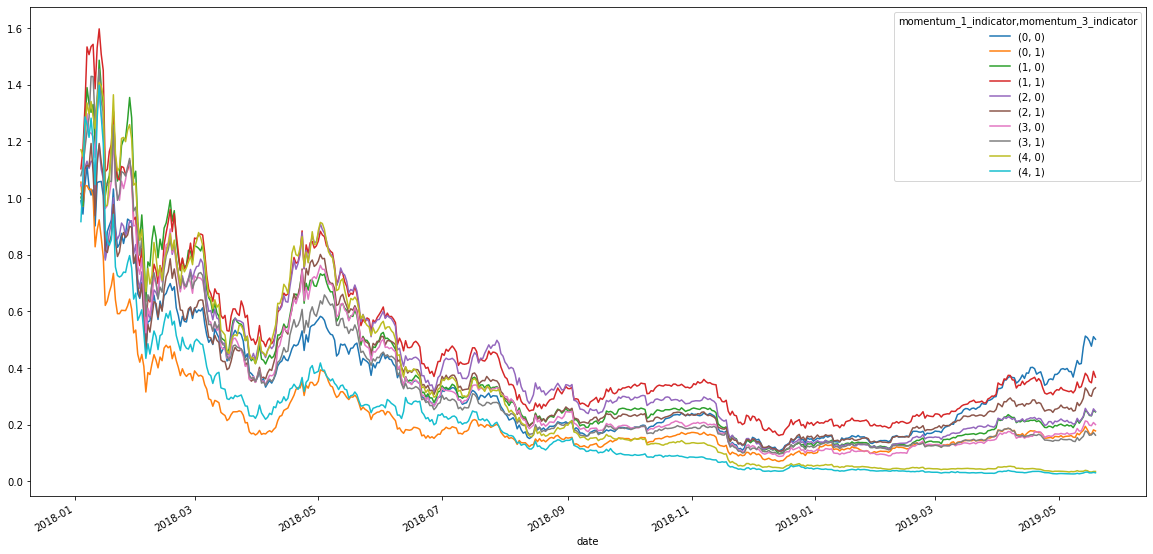

In [65]:
cum_return[0:500].plot(figsize=(20,10))

In [70]:
factor_ret = (a.iloc[:,0] - a.iloc[:,-1])

In [73]:
factor_cum = (factor_ret+1).cumprod()

<AxesSubplot:xlabel='date'>

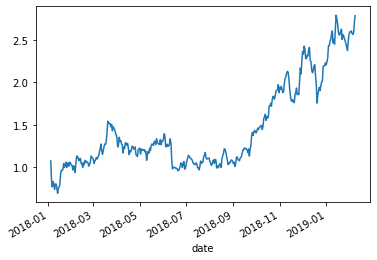

In [81]:
factor_cum[0:400].plot()

In [82]:
cum_return

momentum_1_indicator             0                   1                   2  \
momentum_3_indicator             0         1         0         1         0   
date                                                                         
2018-01-04                0.989953  1.055960  1.003202  1.103007  1.044844   
2018-01-05                0.943231  0.970292  0.971808  1.172489  1.045080   
2018-01-06                1.047235  1.042025  1.260684  1.324156  1.108578   
2018-01-07                1.113044  1.043687  1.389549  1.533045  1.129927   
2018-01-08                1.039014  1.029573  1.332829  1.505881  1.104530   
...                            ...       ...       ...       ...       ...   
2020-12-30            78185.914155  9.011331  0.979270  0.391441  0.518254   
2020-12-31            79541.799757  9.056019  0.965403  0.385585  0.517419   
2021-01-01            81705.023971  9.114184  0.971115  0.390468  0.522272   
2021-01-02            84063.202087  9.450115  0.990178  0.388883  0.526149   
2021-01-03            88783.232425  9.277735  1.026447  0.389671  0.549629   

momentum_1_indicator                   3                   4            
momentum_3_indicator         1         0         1         0         1  
date                                                                    
2018-01-04            1.016011  1.042504  1.078650  1.170523  0.916762  
2018-01-05            0.992356  1.057138  1.108519  1.145870  1.064763  
2018-01-06            1.102621  1.208180  1.176275  1.243840  1.286201  
2018-01-07            1.116259  1.297586  1.235106  1.335510  1.260266  
2018-01-08            1.110714  1.230138  1.283825  1.296752  1.214011  
...                        ...       ...       ...       ...       ...  
2020-12-30            0.243960  0.265928  0.093754  0.010846  0.000012  
2020-12-31            0.240235  0.267707  0.092357  0.010910  0.000011  
2021-01-01            0.243335  0.279361  0.093974  0.010965  0.000011  
2021-01-02            0.251959  0.277424  0.094903  0.010559  0.000010  
2021-01-03            0.268576  0.301634  0.096734  0.011109  0.000011  

[1093 rows x 10 columns]